### Notebook 07: Results and Images

This notebook includes additional results and images for the AAI590 Capstone project and ARB Architecture Model Evaluator application.

In [43]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay

sns.set(style="whitegrid", font_scale=1.1)

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load preprocessed data
preprocessed_file = r'C:\Users\anitr\AAI590_Capstone\AAI590_Capstone_AH\Data\ea_modelset\eamodelset\dataset\preprocessed_models.csv'
models_df = pd.read_csv(preprocessed_file)
models_df.head()

,id,name,duplicateCount,elementCount,relationshipCount,viewCount,num_formats,hasWarning,hasDuplicate,rel_elem_ratio,...,language_pl,language_pt,language_ru,language_sl,language_sv,language_tl,language_vi,language_yo,language_zh,arb_outcome
0,id-48fb3807bfa249a9bae607b6a92cc390,LAE,0,142,296,24,4,0,0,2.084507,...,0,0,0,0,0,0,0,0,0,0
1,4cc127d7-6937-42e8-99fb-19f0f6f4991a,Baseline Media Production,0,22,28,1,4,0,0,1.272727,...,0,0,0,0,0,0,0,0,0,1
2,_7RWQ8CqVEey-A40W5C_9dw,buhService,0,55,41,3,4,0,0,0.745455,...,0,0,1,0,0,0,0,0,0,0
3,3846c562-eab4-4e07-aa95-87703e0e0e69,Data model test,0,15,11,1,2,0,0,0.733333,...,0,0,0,0,0,0,0,0,0,1
4,_ay028PGjEeqygJczXaaxEQ,payments-arch,0,18,20,1,4,0,0,1.111111,...,0,0,0,0,0,0,0,0,0,1


In [3]:
# Define arb_outcome as target variable (y) and features (X)
X = models_df.drop(columns=['name','id','arb_outcome'])
y = models_df['arb_outcome']

# Check shape of X and y
print(f"Models DataFrame shape: {models_df.shape}")
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Models DataFrame shape: (978, 41)
Features shape: (978, 38)
Target shape: (978,)


In [5]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (782, 38), (782,)
Test set shape: (196, 38), (196,)


In [6]:
# Scale features for the neural network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Load saved models
baseline_model_dir = r'C:\Users\anitr\AAI590_Capstone\AAI590_Capstone_AH\Models\baseline_models'
logistic_regression = joblib.load(os.path.join(baseline_model_dir, 'logistic_regression.pkl'))
random_forest = joblib.load(os.path.join(baseline_model_dir, 'random_forest.pkl'))
xgboost = joblib.load(os.path.join(baseline_model_dir, 'xgboost.pkl'))
mlp_baseline = joblib.load(os.path.join(baseline_model_dir, 'mlp_baseline.pkl'))

model_dir = r'C:\Users\anitr\AAI590_Capstone\AAI590_Capstone_AH\Models\tuned_and_hybrid_models'
rf_tuned = joblib.load(os.path.join(model_dir, 'rf_tuned.pkl'))
xgboost_tuned = joblib.load(os.path.join(model_dir, 'xgboost_tuned.pkl'))
hybrid_model_softvoting = joblib.load(os.path.join(model_dir, 'hybrid_softvoting.pkl'))
hybrid_model_stacking = joblib.load(os.path.join(model_dir, 'hybrid_stacking.pkl'))
mlp_tuned = joblib.load(os.path.join(model_dir, 'mlp_tuned.pkl'))

In [15]:
# Evaluate models
models = {
    'Logistic Regression': logistic_regression,
    'Random Forest': random_forest,
    'XGBoost': xgboost,
    'MLP': mlp_baseline,
    'XGBoost Tuned': xgboost_tuned,
    'Random Forest Tuned': rf_tuned,
    'Hybrid Soft Voting': hybrid_model_softvoting,
    'Hybrid Stacking': hybrid_model_stacking,
    'Tuned MLP': mlp_tuned
}

results = []
confusion_matrices = {}
reports = {}

for model_name, model in models.items():
    if model_name == 'Tuned MLP' or model_name == 'MLP':
        y_pred = model.predict(X_test_scaled)   
    else:
        y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    results.append({'Model': model_name, 'Accuracy': accuracy, 'F1 Score': f1})
    
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[model_name] = cm
    
    report = classification_report(y_test, y_pred, output_dict=True)
    reports[model_name] = report

results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
print(results_df)


                 Model  Accuracy  F1 Score
7      Hybrid Stacking  1.000000  1.000000
5  Random Forest Tuned  1.000000  1.000000
6   Hybrid Soft Voting  0.994898  0.995105
2              XGBoost  0.994898  0.995105
4        XGBoost Tuned  0.994898  0.995105
8            Tuned MLP  0.994898  0.995105
1        Random Forest  0.989796  0.990159
3                  MLP  0.979592  0.979494
0  Logistic Regression  0.836735  0.817877


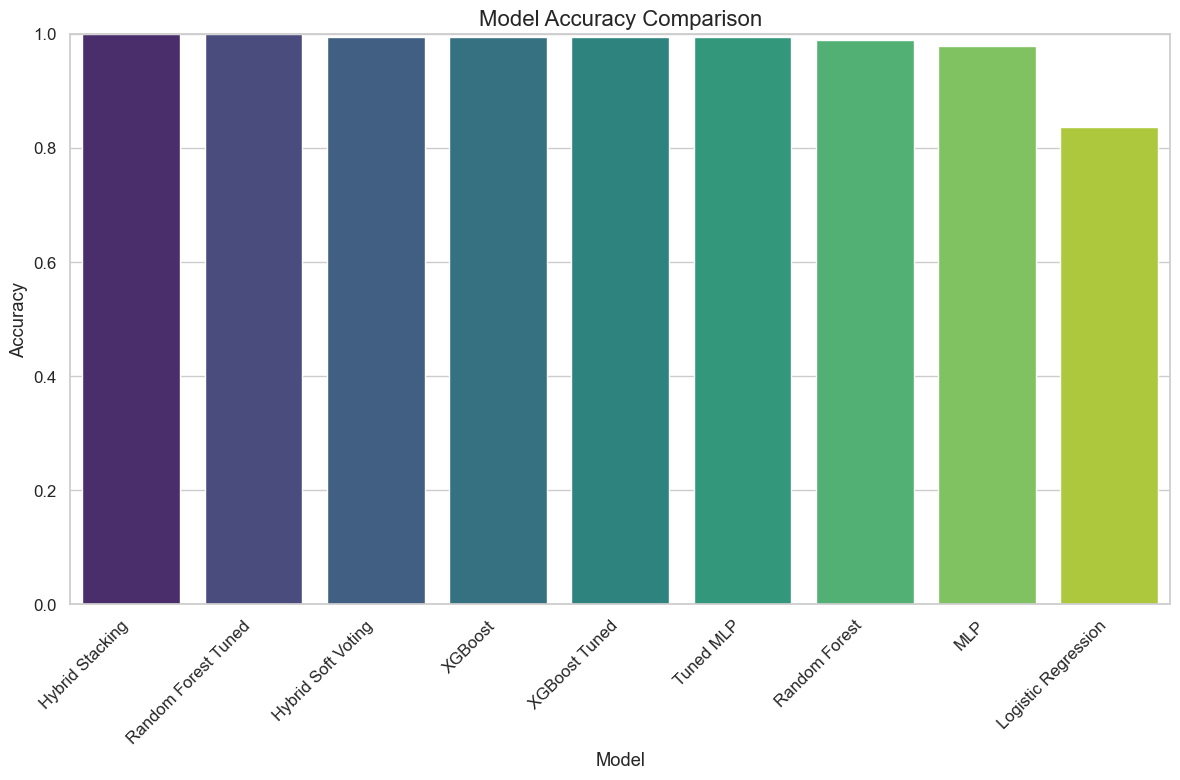

In [17]:
# Plot model accuracy comparison
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
plt.title('Model Accuracy Comparison', fontsize=16)
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

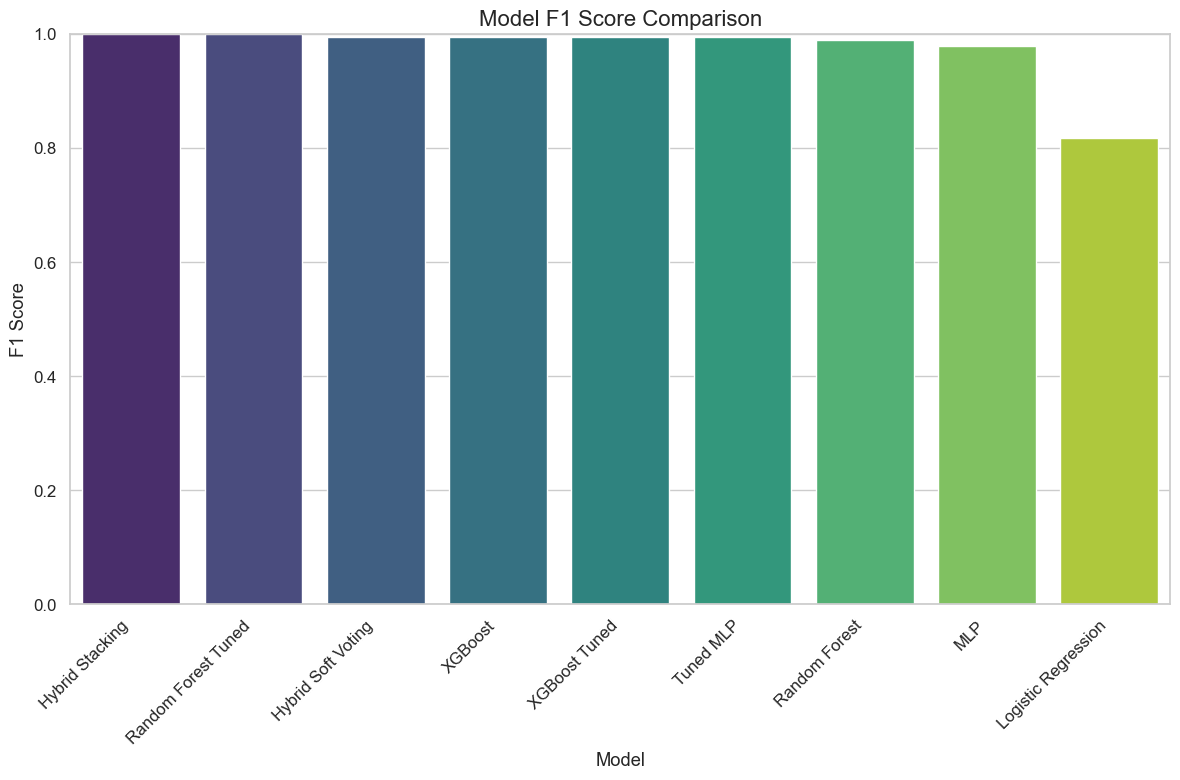

In [40]:
# Plot F1 Score comparison
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='F1 Score', data=results_df, palette='viridis')
plt.title('Model F1 Score Comparison', fontsize=16)
plt.ylabel('F1 Score')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


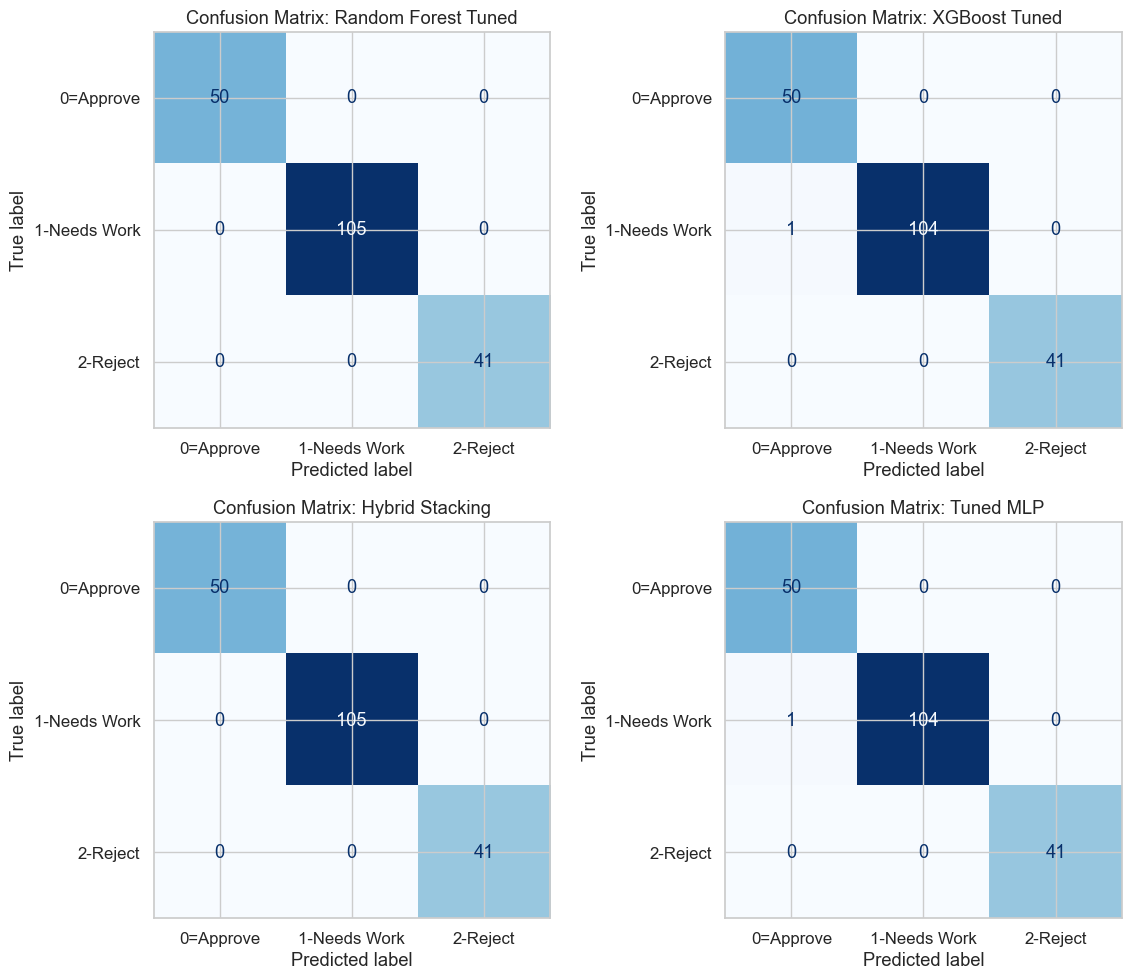

<Figure size 640x480 with 0 Axes>

In [93]:
# Display confusion matrices for top 4 models in 2x2 grid
top_models = ["Random Forest Tuned", "XGBoost Tuned", "Hybrid Stacking", "Tuned MLP"]
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for ax, model_name in zip(axes.ravel(), top_models):
    cm = confusion_matrices[model_name]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0=Approve","1-Needs Work", "2-Reject"])
    disp.plot(ax=ax, colorbar=False, cmap='Blues')
    ax.set_title(f'Confusion Matrix: {model_name}')
plt.tight_layout()
plt.show()



Number of classes in shap_values_trimmed: 1
Shape of each class: [(196, 38, 3)]


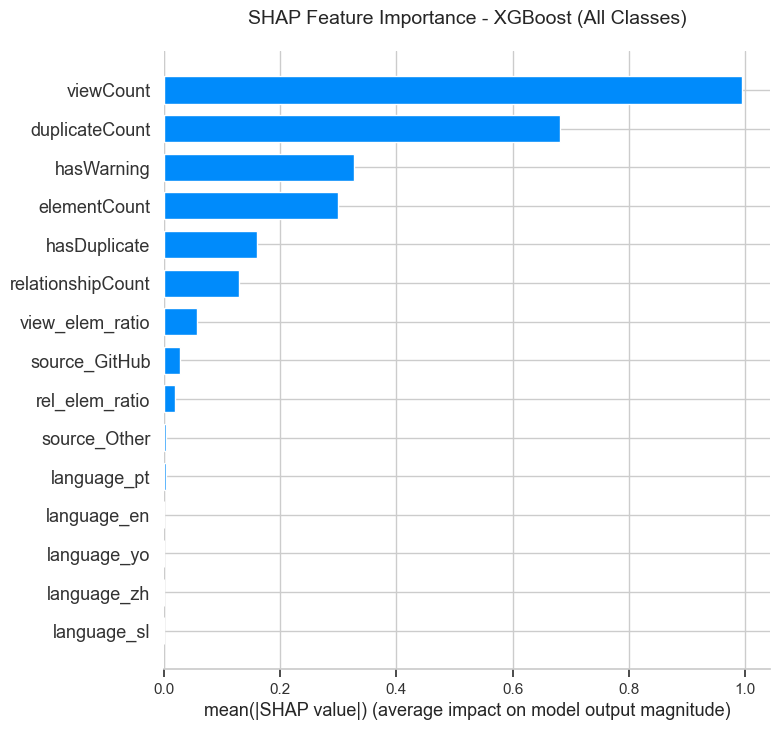

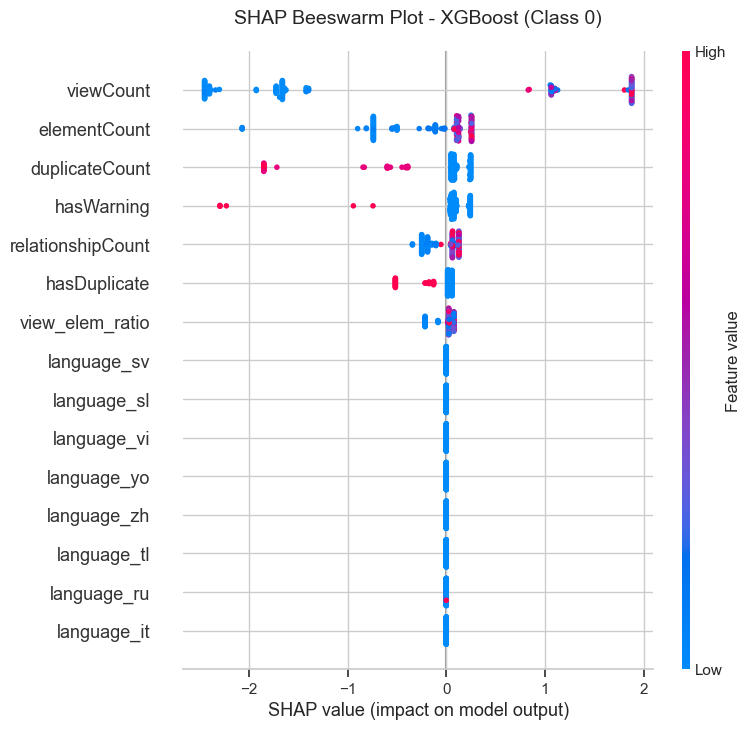

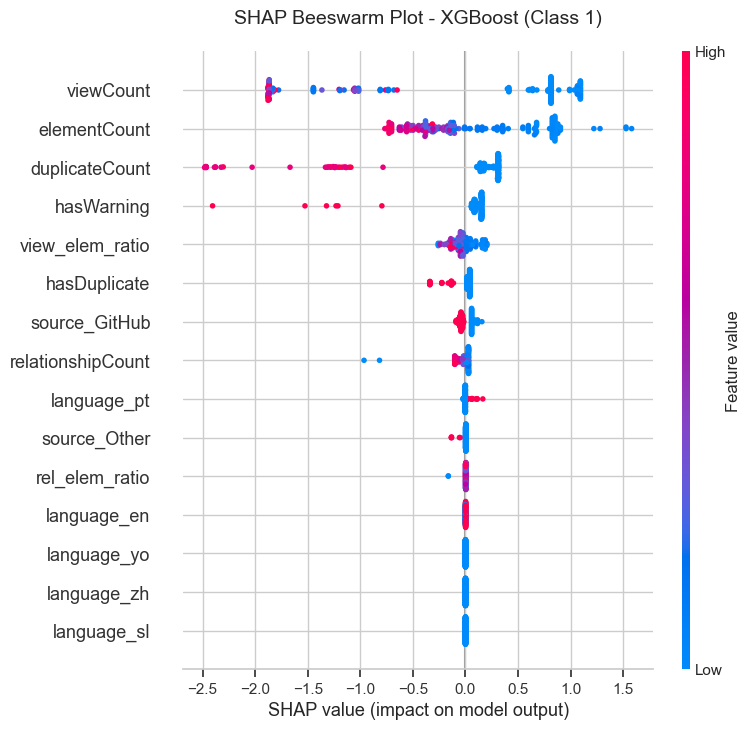

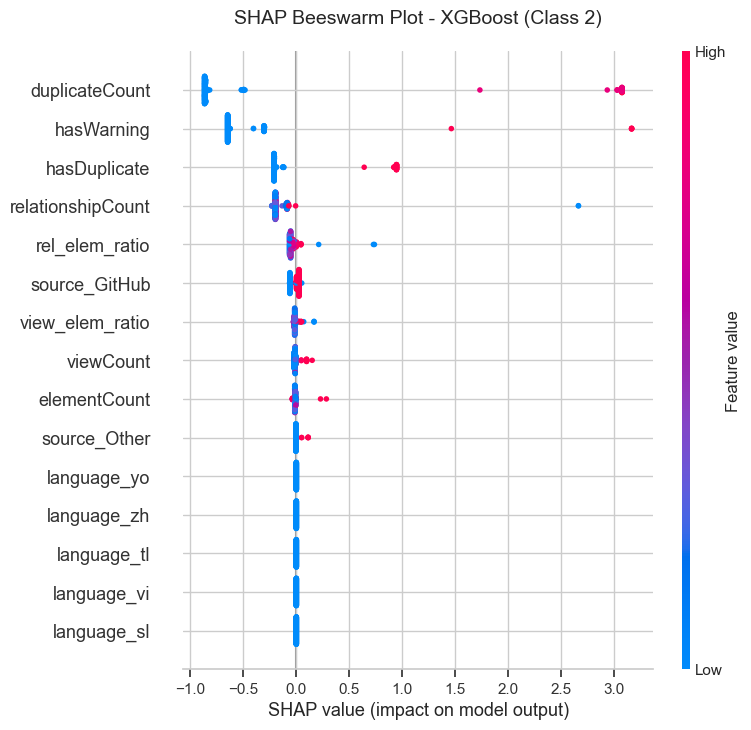

<Figure size 640x480 with 0 Axes>

In [44]:
# SHAP values for XGBoost tuned model
explainer = shap.TreeExplainer(xgboost_tuned)
shap_values = explainer.shap_values(X_test)

if not isinstance(shap_values, list):
    shap_values = [shap_values]

shap_values_trimmed = []
for class_shap_values in shap_values:
    if class_shap_values.shape[1] == X_test.shape[1] +1:
        shap_values_trimmed.append(class_shap_values[:, 1:])
    else:       
        shap_values_trimmed.append(class_shap_values)

# Check the structure of shap_values
print(f"Number of classes in shap_values_trimmed: {len(shap_values_trimmed)}")
print(f"Shape of each class: {[v.shape for v in shap_values_trimmed]}")

# Extract SHAP values for each class from the 3D array
shap_values_class0 = shap_values_trimmed[0][:, :, 0]  # Class 0
shap_values_class1 = shap_values_trimmed[0][:, :, 1]  # Class 1
shap_values_class2 = shap_values_trimmed[0][:, :, 2]  # Class 2

# Plot summary plot for overall feature importance (average across all classes)
shap_values_all = np.mean([np.abs(shap_values_class0), np.abs(shap_values_class1), np.abs(shap_values_class2)], axis=0)
plt.title('SHAP Feature Importance - XGBoost (All Classes)', fontsize=14, pad=20)
shap.summary_plot(shap_values_all, X_test, feature_names=X.columns, plot_type="bar", max_display=15)
plt.tight_layout()


# Plot SHAP beeswarm plot for XGBoost (Class 0) 
plt.title('SHAP Beeswarm Plot - XGBoost (Class 0)', fontsize=14, pad=20)
shap.summary_plot(shap_values_class0, X_test, feature_names=X.columns, max_display=15)
plt.tight_layout()

# Plot SHAP beeswarm plot for XGBoost (Class 1)
plt.title('SHAP Beeswarm Plot - XGBoost (Class 1)', fontsize=14, pad=20)
shap.summary_plot(shap_values_class1, X_test, feature_names=X.columns, max_display=15)
plt.tight_layout()

# Plot SHAP beeswarm plot for XGBoost (Class 2)
plt.title('SHAP Beeswarm Plot - XGBoost (Class 2)', fontsize=14, pad=20)
shap.summary_plot(shap_values_class2, X_test, feature_names=X.columns, max_display=15)
plt.tight_layout()

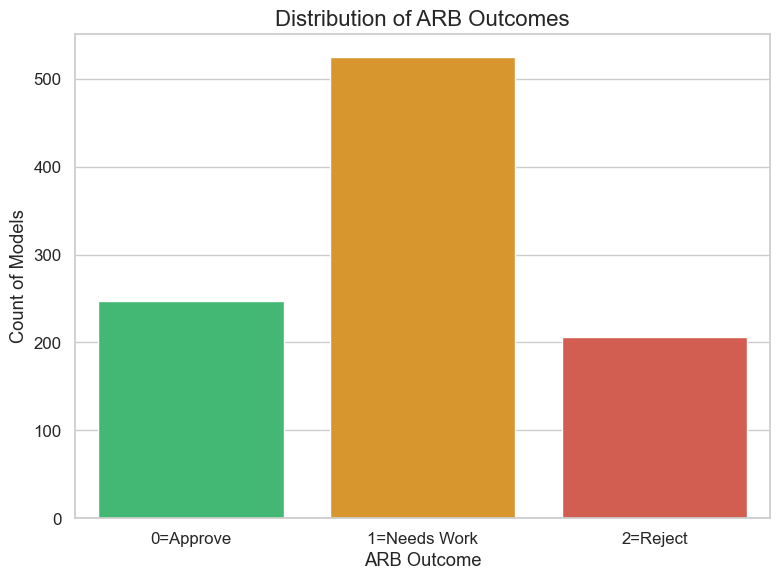

In [71]:
# Outcome Distribution
plt.figure(figsize=(8, 6))
arb_counts = y.value_counts().sort_index()
sns.barplot(x=arb_counts.index, y=arb_counts.values, palette=['#2ecc71', '#f39c12', '#e74c3c'])
plt.xticks(ticks=[0,1,2], labels=['0=Approve', '1=Needs Work', '2=Reject'])
plt.title('Distribution of ARB Outcomes', fontsize=16)
plt.xlabel('ARB Outcome')
plt.ylabel('Count of Models')
plt.tight_layout()
plt.show()


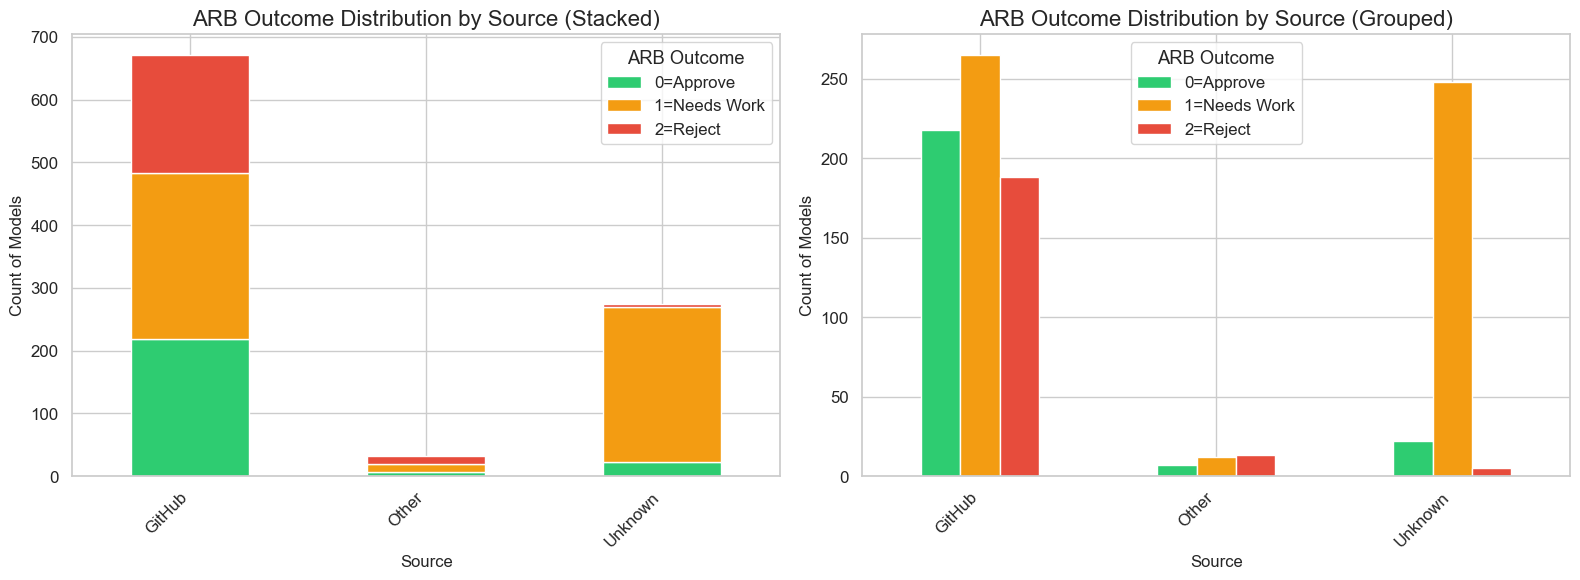


Outcome Distribution by Source:
         0=Approve  1=Needs Work  2=Reject
source                                    
GitHub         218           265       188
Other            7            12        13
Unknown         22           248         5

Percentage Distribution by Source:
         0=Approve  1=Needs Work  2=Reject
source                                    
GitHub       32.49         39.49     28.02
Other        21.88         37.50     40.62
Unknown       8.00         90.18      1.82


In [61]:
# Outcome Distribution by Source
# Create a source column from the one-hot encoded source columns
models_df['source'] = 'Unknown'
models_df.loc[models_df['source_GitHub'] == 1, 'source'] = 'GitHub'
models_df.loc[models_df['source_Other'] == 1, 'source'] = 'Other'

# Create a cross-tabulation of source and arb_outcome
source_outcome = pd.crosstab(models_df['source'], models_df['arb_outcome'])
source_outcome.columns = ['0=Approve', '1=Needs Work', '2=Reject']

# Plot stacked bar chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Stacked bar chart
source_outcome.plot(kind='bar', stacked=True, ax=ax1, color=['#2ecc71', '#f39c12', '#e74c3c'])
ax1.set_title('ARB Outcome Distribution by Source (Stacked)', fontsize=16)
ax1.set_xlabel('Source', fontsize=12)
ax1.set_ylabel('Count of Models', fontsize=12)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.legend(title='ARB Outcome')

# Grouped bar chart
source_outcome.plot(kind='bar', ax=ax2, color=['#2ecc71', '#f39c12', '#e74c3c'])
ax2.set_title('ARB Outcome Distribution by Source (Grouped)', fontsize=16)
ax2.set_xlabel('Source', fontsize=12)
ax2.set_ylabel('Count of Models', fontsize=12)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.legend(title='ARB Outcome')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nOutcome Distribution by Source:")
print(source_outcome)
print("\nPercentage Distribution by Source:")
print((source_outcome.T / source_outcome.sum(axis=1) * 100).T.round(2))

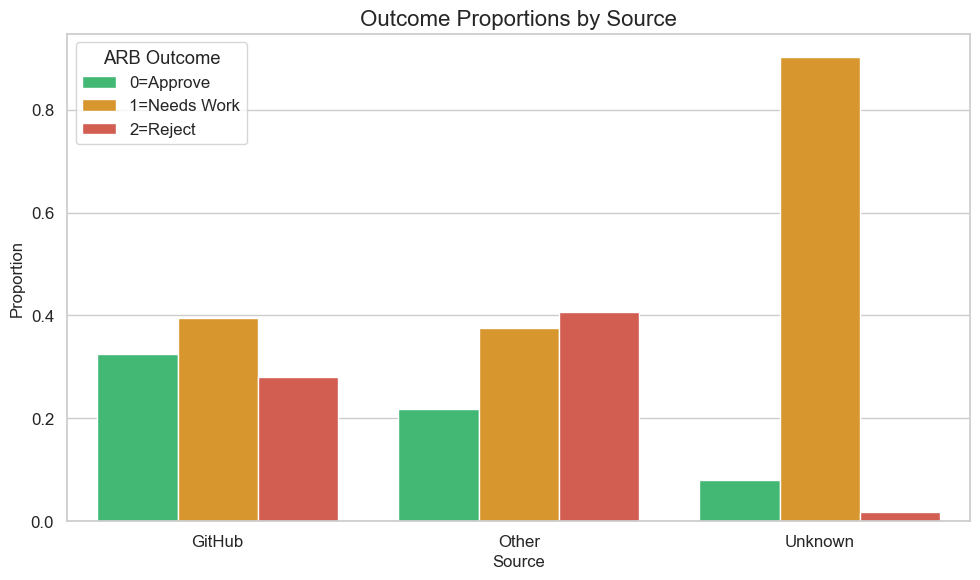

In [87]:
# Outcome Distributions by Source (proportions)
plt.figure(figsize=(10, 6))
outcome_by_source = (
    models_df.groupby("source")["arb_outcome"]
    .value_counts(normalize=True)
    .rename("proportion")
    .reset_index()
)   
ax = sns.barplot(
    data=outcome_by_source,
    x="source",
    y="proportion",
    hue="arb_outcome",
    palette=['#2ecc71', '#f39c12', '#e74c3c']
)
plt.title("Outcome Proportions by Source", fontsize=16)
plt.ylabel("Proportion", fontsize=12)
plt.xlabel("Source", fontsize=12)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['0=Approve', '1=Needs Work', '2=Reject'], title="ARB Outcome")
plt.tight_layout()
plt.show()


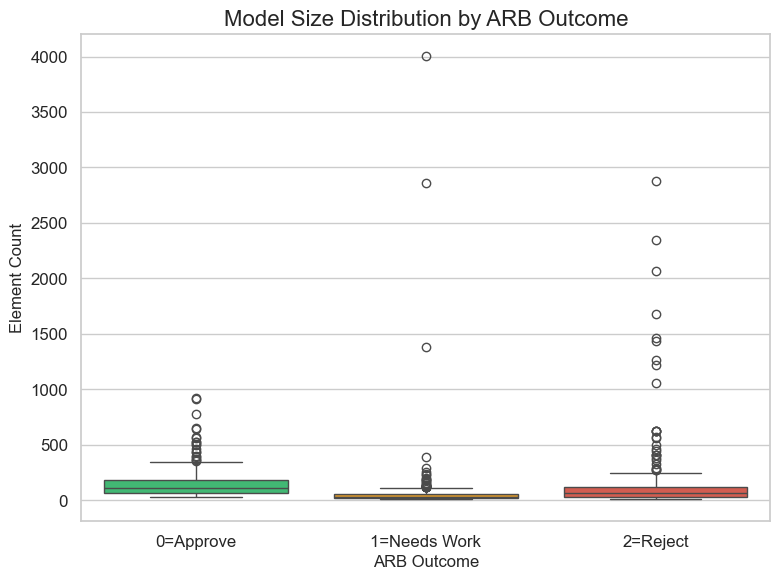

In [80]:
# Boxploy of Model Size by Outcome
plt.figure(figsize=(8, 6))
sns.boxplot(x='arb_outcome', y='elementCount', data=models_df, palette=['#2ecc71', '#f39c12', '#e74c3c'])
plt.xticks(ticks=[0,1,2], labels=['0=Approve', '1=Needs Work', '2=Reject'])
plt.title('Model Size Distribution by ARB Outcome', fontsize=16)
plt.xlabel('ARB Outcome', fontsize=12)
plt.ylabel('Element Count', fontsize=12)
plt.tight_layout()
plt.show()



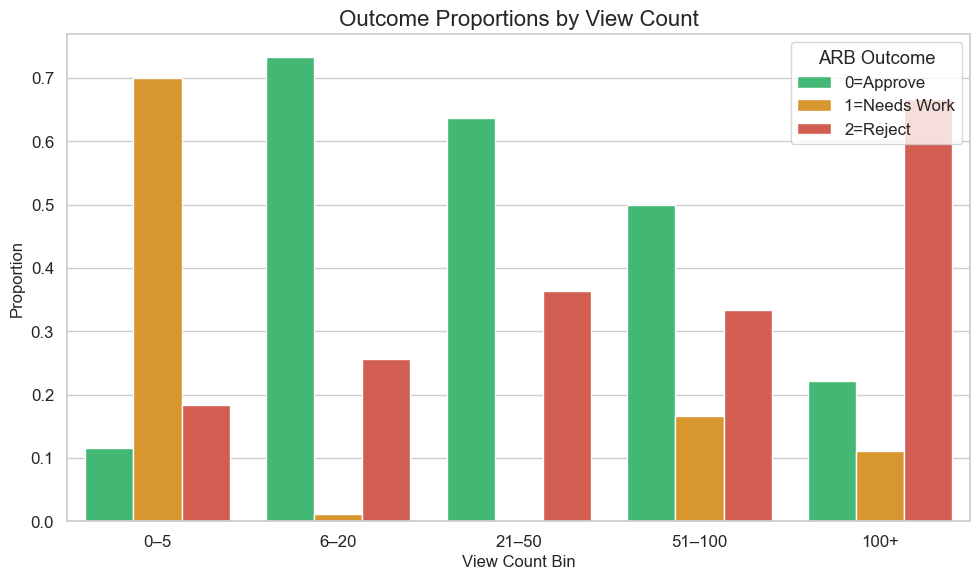

In [86]:
# Outcomes by View Count bins
models_df["viewCount_bin"] = pd.cut(
    models_df["viewCount"],
    bins=[0, 5, 20, 50, 100, models_df["viewCount"].max()],
    labels=["0–5", "6–20", "21–50", "51–100", "100+"]
)       

bin_outcomes = (
    models_df.groupby("viewCount_bin")["arb_outcome"]
    .value_counts(normalize=True)
    .rename("proportion")
    .reset_index()
)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=bin_outcomes,
    x="viewCount_bin",
    y="proportion",
    hue="arb_outcome",
    palette=['#2ecc71', '#f39c12', '#e74c3c']
)
plt.title("Outcome Proportions by View Count", fontsize=16)
plt.xlabel("View Count Bin", fontsize=12)
plt.ylabel("Proportion", fontsize=12)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['0=Approve', '1=Needs Work', '2=Reject'], title="ARB Outcome")
plt.tight_layout()
plt.show()

In [90]:
# Save metrics for app use - Generate predictions and calculate metrics
metrics_file = r'C:\Users\anitr\AAI590_Capstone\AAI590_Capstone_AH\Models\tuned_and_hybrid_models\model_metrics.csv'

# Generate predictions for each model
y_prediction_logistic_regression = logistic_regression.predict(X_test)
y_prediction_rf_tuned = rf_tuned.predict(X_test)
y_prediction_xgboost_tuned = xgboost_tuned.predict(X_test)
y_prediction_hybrid_stacking = hybrid_model_stacking.predict(X_test)
y_prediction_mlp_tuned = mlp_tuned.predict(X_test_scaled)

# Build results list with predictions
results = [
    ("Logistic Regression", y_test, y_prediction_logistic_regression),
    ("Tuned Random Forest", y_test, y_prediction_rf_tuned),
    ("Tuned XGBoost", y_test, y_prediction_xgboost_tuned),
    ("Hybrid Stacking", y_test, y_prediction_hybrid_stacking),
    ("Tuned MLP", y_test, y_prediction_mlp_tuned)  
]

# Calculate metrics
rows = []
for model_name, y_true, y_pred in results:
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='macro')
    rows.append({'Model': model_name, 'Accuracy': accuracy, 'F1-Score': f1})

# Create directory if it doesn't exist and save to CSV
metrics_df = pd.DataFrame(rows)
os.makedirs(os.path.dirname(metrics_file), exist_ok=True)
metrics_df.to_csv(metrics_file, index=False)

print("Metrics saved successfully!")
print(f"File saved to: {metrics_file}")
metrics_df

Metrics saved successfully!
File saved to: C:\Users\anitr\AAI590_Capstone\AAI590_Capstone_AH\Models\tuned_and_hybrid_models\model_metrics.csv


,Model,Accuracy,F1-Score
0,Logistic Regression,0.836735,0.817877
1,Tuned Random Forest,1.000000,1.000000
2,Tuned XGBoost,0.994898,0.995105
3,Hybrid Stacking,1.000000,1.000000
4,Tuned MLP,0.994898,0.995105
